# Part 5 : Advanced Data Analysis
- Merge
- Reshape 
- Metadata Analysis
- Analysis and Reporting

## Merging files
use panda.merge to merage two dataframes. panda merge function can merge two data frames at a time. 
- inner join
- outer join
- left join
- right join

In [3]:
### Import modules
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import xport  ## write sas datasets to local drive

In [4]:
raw1 = {'subjid': ['01-001', '01-002', '01-003', '01-004'],
        'age': [35, 44, 66, np.NaN],
        'sex': ['M','F','F','M']
       }
df1 = pd.DataFrame(raw1)
print(df1)
print("type of np.NaN: ", type(df1.loc[3,'age']))

    age sex  subjid
0  35.0   M  01-001
1  44.0   F  01-002
2  66.0   F  01-003
3   NaN   M  01-004
type of np.NaN:  <class 'numpy.float64'>


In [5]:
raw2 = {'subjid': ['01-001', '01-002', '01-003', '01-005'],
        'dsterm': ['COMPLETED', 'LOST TO FOLLOW-UP', 'COMPLETED','DISCONTINUED'],
       }
df2 = pd.DataFrame(raw2)
print(df2)

              dsterm  subjid
0          COMPLETED  01-001
1  LOST TO FOLLOW-UP  01-002
2          COMPLETED  01-003
3       DISCONTINUED  01-005


In [6]:
## merge data frames on(by) and default of inner join. 
df_merged1 = pd.merge(df1, df2, on='subjid')
print("Innder Join : \n", df_merged1)

Innder Join : 
     age sex  subjid             dsterm
0  35.0   M  01-001          COMPLETED
1  44.0   F  01-002  LOST TO FOLLOW-UP
2  66.0   F  01-003          COMPLETED


In [7]:
## merge data frames on(by) and outer join. 
df_merged2 = pd.merge(df1, df2, on='subjid', how='outer')
print("Outer join : \n", df_merged2)  ## note that Null values (NaN) are included.  

Outer join : 
     age  sex  subjid             dsterm
0  35.0    M  01-001          COMPLETED
1  44.0    F  01-002  LOST TO FOLLOW-UP
2  66.0    F  01-003          COMPLETED
3   NaN    M  01-004                NaN
4   NaN  NaN  01-005       DISCONTINUED


In [8]:
## merge data frames on(by) and left join. 
df_merged3 = pd.merge(df1, df2, on='subjid', how='left')
print("Left join : \n", df_merged3)  ## note that Null values (NaN) are included.  

Left join : 
     age sex  subjid             dsterm
0  35.0   M  01-001          COMPLETED
1  44.0   F  01-002  LOST TO FOLLOW-UP
2  66.0   F  01-003          COMPLETED
3   NaN   M  01-004                NaN


In [9]:
## merge data frames on(by) and right join. 
df_merged4 = pd.merge(df1, df2, on='subjid', how='right')
print("Right join : \n", df_merged4)  ## note that Null values (NaN) are included.  

Right join : 
     age  sex  subjid             dsterm
0  35.0    M  01-001          COMPLETED
1  44.0    F  01-002  LOST TO FOLLOW-UP
2  66.0    F  01-003          COMPLETED
3   NaN  NaN  01-005       DISCONTINUED


In [10]:
raw3 = {'subjid': ['01-001', '01-001', '01-002', '01-002'],
        'visitnum': [1,2,1,2],
        'blood pressure': ['150','151','146','145']
       }
df3 = pd.DataFrame(raw3)
print(df3)

  blood pressure  subjid  visitnum
0            150  01-001         1
1            151  01-001         2
2            146  01-002         1
3            145  01-002         2


In [11]:
## prepare raw data - not sorted
raw4 = {'subjid': ['01-001', '01-001', '01-002', '01-002'],
        'visitnum': [1,2,2,1],
        'weight': ['180','181','160','158']
       }
df4 = pd.DataFrame(raw4)
print(df4)

   subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
2  01-002         2    160
3  01-002         1    158


In [12]:
## Merge by two key variables
df_merged_2 = pd.merge(df3, df4, on=('subjid', 'visitnum')) ## merging by two columns. Data does not need to be sorted
print(df_merged_2)

  blood pressure  subjid  visitnum weight
0            150  01-001         1    180
1            151  01-001         2    181
2            146  01-002         1    158
3            145  01-002         2    160


### Reshaping the data
- Joining data
- Transposing data

In [13]:
## Adding together
df_add = pd.concat([df1,df2])
print(df_add)

    age             dsterm  sex  subjid
0  35.0                NaN    M  01-001
1  44.0                NaN    F  01-002
2  66.0                NaN    F  01-003
3   NaN                NaN    M  01-004
0   NaN          COMPLETED  NaN  01-001
1   NaN  LOST TO FOLLOW-UP  NaN  01-002
2   NaN          COMPLETED  NaN  01-003
3   NaN       DISCONTINUED  NaN  01-005


In [14]:
## Transposing data
raw5 = {'subjid': ['01-001', '01-002', '01-003', '02-001'],
      'sysbp': [154, 152, 148, 149],
      'diabp': [44, 48, 47, 50],
      'weight': [90.5, 83, 78, 77]} ## dicionary
df5 = DataFrame(raw5)
print("Original data frame : \n", df5)

df5_2 = df5[['subjid','diabp','sysbp','weight']]
print("\nReorderded data frame: \n", df5_2)

df_tran = pd.melt(df5_2, id_vars='subjid', value_vars=['diabp', 'sysbp','weight'])
print("\nTransposed data frame : \n", df_tran)

df_tran2 = df_tran.rename(columns={'variable':'parmcd', 'value':'aval'})
print("\nRenamed columns : \n", df_tran2)

Original data frame : 
    diabp  subjid  sysbp  weight
0     44  01-001    154    90.5
1     48  01-002    152    83.0
2     47  01-003    148    78.0
3     50  02-001    149    77.0

Reorderded data frame: 
    subjid  diabp  sysbp  weight
0  01-001     44    154    90.5
1  01-002     48    152    83.0
2  01-003     47    148    78.0
3  02-001     50    149    77.0

Transposed data frame : 
     subjid variable  value
0   01-001    diabp   44.0
1   01-002    diabp   48.0
2   01-003    diabp   47.0
3   02-001    diabp   50.0
4   01-001    sysbp  154.0
5   01-002    sysbp  152.0
6   01-003    sysbp  148.0
7   02-001    sysbp  149.0
8   01-001   weight   90.5
9   01-002   weight   83.0
10  01-003   weight   78.0
11  02-001   weight   77.0

Renamed columns : 
     subjid  parmcd   aval
0   01-001   diabp   44.0
1   01-002   diabp   48.0
2   01-003   diabp   47.0
3   02-001   diabp   50.0
4   01-001   sysbp  154.0
5   01-002   sysbp  152.0
6   01-003   sysbp  148.0
7   02-001   sysbp  149

In [15]:
## Pivotting the data
df_tran3 = pd.pivot_table(df_tran2, values='aval', columns=['parmcd'], index=['subjid'])
print("Transposed data : \n", df_tran3)
print("Its columns : ", df_tran3.columns)
print("Its indexes : ",df_tran3.index)

df_tran4 = df_tran3.reset_index()
print("\nResetted index data : \n", df_tran4)
print("Its columns : ",df_tran4.columns)
print("Its index : ",df_tran4.index)

Transposed data : 
 parmcd  diabp  sysbp  weight
subjid                      
01-001   44.0  154.0    90.5
01-002   48.0  152.0    83.0
01-003   47.0  148.0    78.0
02-001   50.0  149.0    77.0
Its columns :  Index(['diabp', 'sysbp', 'weight'], dtype='object', name='parmcd')
Its indexes :  Index(['01-001', '01-002', '01-003', '02-001'], dtype='object', name='subjid')

Resetted index data : 
 parmcd  subjid  diabp  sysbp  weight
0       01-001   44.0  154.0    90.5
1       01-002   48.0  152.0    83.0
2       01-003   47.0  148.0    78.0
3       02-001   50.0  149.0    77.0
Its columns :  Index(['subjid', 'diabp', 'sysbp', 'weight'], dtype='object', name='parmcd')
Its index :  RangeIndex(start=0, stop=4, step=1)


In [16]:
## Removing duplicate records
raw6 = {'subjid': ['01-001', '01-001', '01-001', '01-001'],
        'visitnum': [1,2,2,3],
        'weight': ['180','181','160','158']
       }
df6 = pd.DataFrame(raw6)
print("Data with duplicated records: \n", df6)

df_dup = df6.drop_duplicates(subset=['subjid','visitnum'])
print("\nRemoving duplicated records: \n", df_dup) # note that first row is kept. Need to sort accordingly.

Data with duplicated records: 
    subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
2  01-001         2    160
3  01-001         3    158

Removing duplicated records: 
    subjid  visitnum weight
0  01-001         1    180
1  01-001         2    181
3  01-001         3    158


### Metadata

In [17]:
import xport  ## write sas datasets to local drive
from sas7bdat import SAS7BDAT  ## read SAS datasets from local drive

In [18]:
## Read SAS datasets
with SAS7BDAT('./data/raw/adtteos.sas7bdat') as file: 
    df_tteos = file.to_data_frame()

In [19]:
## Metadata of input data
print("Information of input data: \n", df_tteos.info())
print("Description of numeric columns of input data: \n", df_tteos.describe())
print("List of columns: \n ", df_tteos.columns)
print("Shape of input data: \n", df_tteos.shape) ## 300 records and 17 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 17 columns):
SUBJID      300 non-null object
SITEID      300 non-null object
FASFL       300 non-null object
SAFFL       300 non-null object
TRTP        300 non-null object
TRTPN       300 non-null float64
PARAM       300 non-null object
PARAMCD     300 non-null object
PARAMTYP    300 non-null object
AVISIT      300 non-null object
AVISITN     300 non-null float64
AVAL        300 non-null float64
STARTDT     300 non-null object
ADT         300 non-null object
ADTF        300 non-null object
CNSR        300 non-null float64
EVNTDESC    300 non-null object
dtypes: float64(4), object(13)
memory usage: 39.9+ KB
Information of input data: 
 None
Description of numeric columns of input data: 
             TRTPN  AVISITN        AVAL        CNSR
count  300.000000    300.0  300.000000  300.000000
mean     1.506667     91.0   45.620000    0.343333
std      0.500791      0.0   33.842972    0.475615
min    

In [20]:
## first and last 5 records
print("\nFirst five data: \n", df_tteos.head())
print("\nLast five data: \n", df_tteos.tail())


First five data: 
     SUBJID SITEID FASFL SAFFL        TRTP  TRTPN          PARAM PARAMCD  \
0  310-001    310     Y     Y     Control    1.0  Days to Death   DEATH   
1  310-002    310     Y     Y     Control    1.0  Days to Death   DEATH   
2  310-003    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
3  310-004    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   
4  310-005    310     Y     Y  Study Drug    2.0  Days to Death   DEATH   

  PARAMTYP               AVISIT  AVISITN  AVAL     STARTDT         ADT ADTF  \
0  DERIVED  Double-Blind Period     91.0   1.0  2007-11-12  2007-11-12        
1  DERIVED  Double-Blind Period     91.0  83.0  2008-01-11  2008-04-02        
2  DERIVED  Double-Blind Period     91.0  84.0  2008-02-01  2008-04-24        
3  DERIVED  Double-Blind Period     91.0   9.0  2008-02-07  2008-02-15        
4  DERIVED  Double-Blind Period     91.0  51.0  2008-02-21  2008-04-11        

   CNSR                       EVNTDESC  
0   0.0      

In [21]:
## Frequency of columns
print("Frequency count of TRTP : \n", df_tteos['TRTP'].value_counts())
print("\nFrequency count of TRTP and SITEID: \n", df_tteos.groupby(['TRTP', 'SITEID'])['SUBJID'].count())  

Frequency count of TRTP : 
 Study Drug    152
Control       148
Name: TRTP, dtype: int64

Frequency count of TRTP and SITEID: 
 TRTP        SITEID
Control     310        5
            311       18
            313       16
            314       14
            315       10
            316        2
            317        2
            318        3
            319        7
            320       15
            321        1
            323       11
            325       12
            326       11
            327        2
            328        9
            340        4
            341        2
            342        2
            343        2
Study Drug  310        6
            311       18
            313       17
            314       13
            315       10
            316        3
            317        1
            318        5
            319        8
            320       15
            321        2
            323       14
            325       11
            326        9
   

In [22]:
## other gropuby function
print("\nAverage of time to event day per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].mean())  
print("\nDescriptive statistics per treatment: \n", df_tteos.groupby(['TRTP'])['AVAL'].describe()) 


Average of time to event day per treatment: 
 TRTP
Control       45.729730
Study Drug    45.513158
Name: AVAL, dtype: float64

Descriptive statistics per treatment: 
             count       mean        std  min    25%   50%   75%   max
TRTP                                                                 
Control     148.0  45.729730  34.319546  1.0  10.75  40.5  84.0  96.0
Study Drug  152.0  45.513158  33.485588  1.0  13.00  45.0  83.0  92.0


## Statistics Analysis

In [1]:
## import python stat packages
from scipy import stats

### Pair t-test

In [26]:
## pair t-test
stats.ttest_ind(df_tteos[df_tteos['TRTP']=='Control']['AVAL'], df_tteos[df_tteos['TRTP']=='Study Drug']['AVAL'])

Ttest_indResult(statistic=0.0553223058850432, pvalue=0.9559187636178077)

In [29]:
## Read SAS datasets
with open('./data/raw/adsl.xpt', 'rb') as f: 
    _xport_adsl = xport.to_columns(f)
    df_adsl = pd.DataFrame(_xport_adsl) 
    

In [32]:
df_adsl.head()

,AGE,AGEGRP,AGEGRPN,AGEU,ARM,ARMCD,ARMN,AVGDD,BMIBL,BMIBLGRP,...,TRTDOSE,TRTDUR,TRTP,TRTPCD,TRTPN,TRTSTDT,USUBJID,VISIT1DT,VISNUMEN,WEIGHTBL
0,63.0,<65,1.0,YEARS,Placebo,Pbo,0.0,0.0,25.1,25-<30,...,0.0,182.0,Placebo,Pbo,0.0,19725.0,01-701-1015,19718.0,12.0,54.4
1,64.0,<65,1.0,YEARS,Placebo,Pbo,0.0,0.0,30.4,>=30,...,0.0,28.0,Placebo,Pbo,0.0,19210.0,01-701-1023,19196.0,5.0,80.3
2,71.0,65-80,2.0,YEARS,Xanomeline High Dose,Xan_Hi,2.0,77.7,31.4,>=30,...,81.0,180.0,Xanomeline High Dose,Xan_Hi,2.0,19558.0,01-701-1028,19550.0,12.0,99.3
3,74.0,65-80,2.0,YEARS,Xanomeline Low Dose,Xan_Lo,1.0,54.0,28.8,25-<30,...,54.0,14.0,Xanomeline Low Dose,Xan_Lo,1.0,19800.0,01-701-1033,19792.0,5.0,88.5
4,77.0,65-80,2.0,YEARS,Xanomeline High Dose,Xan_Hi,2.0,76.9,26.1,25-<30,...,81.0,183.0,Xanomeline High Dose,Xan_Hi,2.0,19905.0,01-701-1034,19898.0,12.0,62.6


In [38]:
df_adsl.columns

Index(['AGE', 'AGEGRP', 'AGEGRPN', 'AGEU', 'ARM', 'ARMCD', 'ARMN', 'AVGDD',
       'BMIBL', 'BMIBLGRP', 'COMPLT16', 'COMPLT24', 'COMPLT8', 'CUMDOSE',
       'DEATH', 'DISCONT', 'DISONSET', 'DOMAIN', 'DSDECOD', 'DSREASAE',
       'DSREASCD', 'DURDIS', 'DURDISGR', 'EDUCLVL', 'EFFICACY', 'ENDDT',
       'HEIGHTBL', 'ITT', 'LSTDOSDT', 'MMSETOT', 'RACE', 'RACEN', 'RANDDT',
       'RFENDTC', 'RFSTDTC', 'SAFETY', 'SEX', 'SITEGRP', 'SITEID', 'STUDYID',
       'SUBJID', 'TRTDOSE', 'TRTDUR', 'TRTP', 'TRTPCD', 'TRTPN', 'TRTSTDT',
       'USUBJID', 'VISIT1DT', 'VISNUMEN', 'WEIGHTBL'],
      dtype='object')

### Fisher Exact Test

In [47]:
## Fisher Exact Test 
df_adsl['TRTP1'] = df_adsl.TRTP.replace(['Xanomeline High Dose', 'Xanomeline Low Dose'],['Xanomeline','Xanomeline']) ## conversion
count = df_adsl.groupby(['TRTP1','DISCONT'])['SUBJID'].count()  ## occurence count of treatment and discontinuation
print("Catoegorical results of trtment and discontinuation: \n", count)
print(type(count))

Catoegorical results of trtment and discontinuation: 
 TRTP1       DISCONT
Placebo                 58
            Y           28
Xanomeline              52
            Y          116
Name: SUBJID, dtype: int64
<class 'pandas.core.series.Series'>


In [50]:
count.values.reshape(2,2) ## convert values of Series to numpy with 2 by 2 shape

array([[ 58,  28],
       [ 52, 116]], dtype=int64)

In [52]:
oddsratio, pvalue = stats.fisher_exact(count.values.reshape(2,2)) ## 2 by 2 array is an input.  
print("Odds Ratio : \n", oddsratio)
print("P value: \n", pvalue)

Odds Ratio : 
 4.6208791208791204
P value: 
 3.189001514988957e-08


### Survival analysis - log rank test

In [54]:
## import lifeline logrank test function
from lifelines.statistics import logrank_test

In [65]:
df_tteos.groupby(['TRTP']).count()

,SUBJID,SITEID,FASFL,SAFFL,TRTPN,PARAM,PARAMCD,PARAMTYP,AVISIT,AVISITN,AVAL,STARTDT,ADT,ADTF,CNSR,EVNTDESC
TRTP,,,,,,,,,,,,,,,,
Control,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148,148
Study Drug,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152,152


In [70]:
tte_control = df_tteos[df_tteos['TRTP']=='Control'][['TRTP','AVAL','CNSR']]
print("Treatment data occurrence : ", tte_control.groupby(['TRTP']).count())

tte_sd = df_tteos[df_tteos['TRTP']=='Study Drug'][['TRTP','AVAL','CNSR']]
print("Treatment data occurrence : ", tte_sd.groupby(['TRTP']).count())

Treatment data occurrence :           AVAL  CNSR
TRTP               
Control   148   148
Treatment data occurrence :              AVAL  CNSR
TRTP                  
Study Drug   152   152


In [83]:
results = logrank_test(tte_control['AVAL'], tte_sd['AVAL'], event_observed_A=tte_control['CNSR'], event_observed_B=tte_sd['AVAL'], alpha=.95)

results.print_summary()
print("p-value of log rank test on adtteos : ", results.p_value)


t_0=-1, alpha=0.95, null_distribution=chi squared, df=1

test_statistic      p     
       57.9232 0.0000  ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1 
p-value of log rank test on adtteos :  2.725523833814784e-14


### Survival analysis - Kaplan Meier Curves

Text(0.5,1,'Kaplan Meier curves between Control and Study Drug')

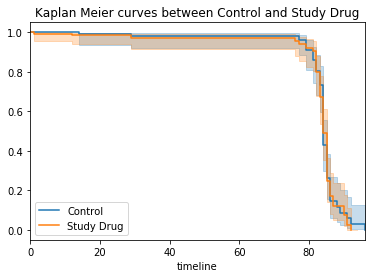

In [86]:
### Import lifelines and Kaplan Meier Curves 
from lifelines.estimation import KaplanMeierFitter
import matplotlib.pyplot as plt ## import plotting library
%matplotlib inline ## make plot outputs appear and be stored in notebook

kmf = KaplanMeierFitter()

### Prepare Kaplan Meier Curves
ax = plt.subplot(111)

kmf.fit(tte_control.AVAL, event_observed=tte_control.CNSR, label=['Control'])
kmf.plot(ax=ax)
kmf.fit(tte_sd.AVAL, event_observed=tte_sd.CNSR, label=['Study Drug'])
kmf.plot(ax=ax)

plt.title('Kaplan Meier curves between Control and Study Drug')